In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [287]:
df = pd.read_csv('mw_pw_profiles.csv')

/var/folders/mt/rpdwshfn4zq0s3rrfk2d1g2m0000gn/T/ipykernel_39157/4074299597.py:1: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mw_pw_profiles.csv')


In [288]:
df = df.drop(columns = ['key_cricinfo_3', 'key_cricketarchive_2', 'key_opta_2', 'key_crichq','key_bcci_2', 'key_cricheroes', 'key_nvplay_2', 'key_cricinfo_2','key_pulse_2', 'key_cricbuzz', 'key_opta', 'key_cricketworld',
    'key_cricingif','key_bcci', 'key_bigbash', 'key_nvplay','key_pulse', 'key_cricketarchive', 'key_cricinfo','full_name', 'batting_style', 'bowling_style', 'playing_role'])

In [289]:
def split(df, date):
    train = df[df['start_date']<pd.to_datetime(date)]
    test = df[df['start_date']>=pd.to_datetime(date)]
    return train,test

In [290]:
df['overs_bowled']=df['balls_bowled']/6
df['boundaries_scored'] = df['fours_scored']+df['sixes_scored']

In [291]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [292]:
df_t20 = df.query("match_type == 'T20'")

In [293]:
df_t20

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,player_team,opposition_team,name_y,unique_name,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,overs_bowled,boundaries_scored
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,Sierra Leone,Namibia,M King,M King,[],5,8,17,0.0,1
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,Sierra Leone,Uganda,M King,M King,[],3,0,7,0.0,1
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,Sierra Leone,Nigeria,M King,M King,[],1,0,5,0.0,0
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,Sierra Leone,Cameroon,M King,M King,[],0,0,4,0.0,0
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,Sierra Leone,Uganda,M King,M King,[],-5,0,-1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,fffa744b,1473475,male,6,2025-04-20,Indian Premier League,T20,Naman Dhir,0,0,...,Mumbai Indians,Chennai Super Kings,Naman Dhir,Naman Dhir,[],0,0,4,0.0,0
416708,fffa744b,1473478,male,6,2025-04-23,Indian Premier League,T20,Naman Dhir,0,0,...,Mumbai Indians,Sunrisers Hyderabad,Naman Dhir,Naman Dhir,[],0,8,12,0.0,0
416709,fffa744b,1473482,male,6,2025-04-27,Indian Premier League,T20,Naman Dhir,25,0,...,Mumbai Indians,Lucknow Super Giants,Naman Dhir,Naman Dhir,[],37,8,49,0.0,4
416710,fffa744b,1473487,male,6,2025-05-01,Indian Premier League,T20,Naman Dhir,0,0,...,Mumbai Indians,Rajasthan Royals,Naman Dhir,Naman Dhir,[],0,0,4,0.0,0


In [294]:
df_train, df_test = split(df_t20,'2023-9-21')

In [295]:
df_train

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,player_team,opposition_team,name_y,unique_name,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,overs_bowled,boundaries_scored
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,Sierra Leone,Namibia,M King,M King,[],5,8,17,0.0,1
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,Sierra Leone,Uganda,M King,M King,[],3,0,7,0.0,1
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,Sierra Leone,Nigeria,M King,M King,[],1,0,5,0.0,0
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,Sierra Leone,Cameroon,M King,M King,[],0,0,4,0.0,0
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,Sierra Leone,Uganda,M King,M King,[],-5,0,-1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416684,fff4e348,1190753,female,6,2019-08-13,Women's T20I Quadrangular Series (in Netherlands),T20,RK Willis,13,0,...,Scotland,Netherlands,RK Willis,RK Willis,[],14,0,18,0.0,1
416685,fff4e348,1190754,female,6,2019-08-14,Women's T20I Quadrangular Series (in Netherlands),T20,RK Willis,1,1,...,Scotland,Ireland,RK Willis,RK Willis,[],1,0,5,0.0,0
416686,fff4e348,1197049,female,6,2019-08-31,ICC Women's T20 World Cup Qualifier,T20,RK Willis,4,1,...,Scotland,United States of America,RK Willis,RK Willis,[],5,0,9,0.0,1
416687,fff4e348,1197052,female,6,2019-09-01,ICC Women's T20 World Cup Qualifier,T20,RK Willis,3,0,...,Scotland,Papua New Guinea,RK Willis,RK Willis,[],3,0,7,0.0,0


In [296]:
df_train.sort_values('start_date',inplace=True)
df_test.sort_values('start_date',inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

/var/folders/mt/rpdwshfn4zq0s3rrfk2d1g2m0000gn/T/ipykernel_39157/2327620672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.sort_values('start_date',inplace=True)
/var/folders/mt/rpdwshfn4zq0s3rrfk2d1g2m0000gn/T/ipykernel_39157/2327620672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.sort_values('start_date',inplace=True)


In [297]:
def calculate_rolling_average(df_t20):
    df_t20['strike_rate_1'] = (df_t20['runs_scored'] / df_t20['balls_faced']).shift().rolling(1, min_periods=1).mean() * 100
    df_t20['strike_rate_5'] = (df_t20['runs_scored'] / df_t20['balls_faced']).shift().rolling(5, min_periods=1).mean() * 100
    df_t20['strike_rate_10'] = (df_t20['runs_scored'] / df_t20['balls_faced']).shift().rolling(10, min_periods=5).mean() * 100
    
    df_t20['runs_scored_1'] = df_t20['runs_scored'].shift().rolling(1, min_periods=1).mean()
    df_t20['runs_scored_5'] = df_t20['runs_scored'].shift().rolling(5, min_periods=1).mean()
    df_t20['runs_scored_10'] = df_t20['runs_scored'].shift().rolling(10, min_periods=5).mean()
    
    df_t20['economy_rate_1'] = df_t20['runs_conceded'] / df_t20['overs_bowled'].shift().rolling(1, min_periods=1).mean()
    df_t20['economy_rate_5'] = df_t20['runs_conceded'] / df_t20['overs_bowled'].shift().rolling(5, min_periods=1).mean()
    df_t20['economy_rate_10'] = df_t20['runs_conceded'] / df_t20['overs_bowled'].shift().rolling(10, min_periods=5).mean()

    df_t20['wickets_1'] = df_t20['wickets_taken'].shift().rolling(1, min_periods=1).mean()
    df_t20['wickets_5'] = df_t20['wickets_taken'].shift().rolling(5, min_periods=1).mean()
    df_t20['wickets_10'] = df_t20['wickets_taken'].shift().rolling(10, min_periods=5).mean()

    df_t20['boundaries_1'] = df_t20['boundaries_scored'].shift().rolling(1, min_periods=1).mean()
    df_t20['boundaries_5'] = df_t20['boundaries_scored'].shift().rolling(5, min_periods=1).mean()
    df_t20['boundaries_10'] = df_t20['boundaries_scored'].shift().rolling(10, min_periods=5).mean()
    
    df_t20['catches_1'] = df_t20['catches_taken'].shift().rolling(1, min_periods=1).mean()
    df_t20['catches_5'] = df_t20['catches_taken'].shift().rolling(5, min_periods=1).mean()
    df_t20['catches_10'] = df_t20['catches_taken'].shift().rolling(10, min_periods=5).mean()
    
    df_t20['dot_balls_as_batsman_1'] = df_t20['dot_balls_as_batsman'].shift().rolling(1, min_periods=1).mean()
    df_t20['dot_balls_as_batsman_5'] = df_t20['dot_balls_as_batsman'].shift().rolling(5, min_periods=1).mean()
    df_t20['dot_balls_as_batsman_10'] = df_t20['dot_balls_as_batsman'].shift().rolling(10, min_periods=5).mean()
    
    df_t20['dot_balls_as_bowler_1'] = df_t20['dot_balls_as_bowler'].shift().rolling(1, min_periods=1).mean()
    df_t20['dot_balls_as_bowler_5'] = df_t20['dot_balls_as_bowler'].shift().rolling(5, min_periods=1).mean()
    df_t20['dot_balls_as_bowler_10'] = df_t20['dot_balls_as_bowler'].shift().rolling(10, min_periods=5).mean()
    
    return df_t20

In [298]:
df_t20.groupby('player_id')['name_x'].count()

player_id
00015688      5
00029c30      6
0030a57d     15
00321fff     26
00335246      5
           ... 
ffddff25      1
ffdfa9ad     22
ffe699c0    384
fff4e348     14
fffa744b     23
Name: name_x, Length: 9966, dtype: int64

In [299]:
def player_features(df_t20):
    features = []
    for player_id, group in df_t20.groupby('player_id'):
        group = group.sort_values('start_date')
        group = calculate_rolling_average(group)
        features.append(group)
        
    df_features = pd.concat(features)
    df_features = df_features.reset_index(drop=True)
    # Use a list for column selection, not parentheses
    return df_features[['name_x','player_id', 'match_id', 'start_date', 'strike_rate_1', 'strike_rate_5', 'strike_rate_10',
           'economy_rate_1', 'economy_rate_5', 'economy_rate_10',
           'wickets_1', 'wickets_5', 'wickets_10',
           'boundaries_1', 'boundaries_5', 'boundaries_10', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10', 'catches_1', 'catches_5', 'catches_10', 'dot_balls_as_batsman_1', 'dot_balls_as_batsman_5', 'dot_balls_as_batsman_10', 'dot_balls_as_bowler_1', 'dot_balls_as_bowler_5', 'dot_balls_as_bowler_10']]
    
df_kohli_t20 = df_t20.query("name_x == 'V Kohli'")



In [300]:
df_kohli_t20

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,player_team,opposition_team,name_y,unique_name,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,overs_bowled,boundaries_scored
299148,ba607b88,1034825,male,6,2017-01-26,England in India T20I Series,T20,V Kohli,29,1,...,India,England,V Kohli,V Kohli,[],33,0,37,0.0,4
299149,ba607b88,1034827,male,6,2017-01-29,England in India T20I Series,T20,V Kohli,21,1,...,India,England,V Kohli,V Kohli,[],27,0,31,0.0,3
299150,ba607b88,1034829,male,6,2017-02-01,England in India T20I Series,T20,V Kohli,2,1,...,India,England,V Kohli,V Kohli,[],2,28,34,0.0,0
299151,ba607b88,1041615,male,6,2016-08-27,West Indies v India T20I Series,T20,V Kohli,16,1,...,India,West Indies,V Kohli,V Kohli,[],19,0,23,0.0,3
299152,ba607b88,1041617,male,6,2016-08-28,West Indies v India T20I Series,T20,V Kohli,0,0,...,India,West Indies,V Kohli,V Kohli,[],0,8,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299920,ba607b88,980995,male,6,2016-05-16,Indian Premier League,T20,V Kohli,75,0,...,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,V Kohli,[],96,0,100,0.0,8
299921,ba607b88,980999,male,6,2016-05-18,Indian Premier League,T20,V Kohli,113,1,...,Royal Challengers Bangalore,Kings XI Punjab,V Kohli,V Kohli,[],163,8,175,0.0,20
299922,ba607b88,981011,male,6,2016-05-22,Indian Premier League,T20,V Kohli,54,0,...,Royal Challengers Bangalore,Delhi Daredevils,V Kohli,V Kohli,[],68,8,80,0.0,6
299923,ba607b88,981013,male,6,2016-05-24,Indian Premier League,T20,V Kohli,0,1,...,Royal Challengers Bangalore,Gujarat Lions,V Kohli,V Kohli,[],-2,16,18,0.0,0


In [301]:
df_kohli_t20 = df_kohli_t20.drop(columns=['gender'])

In [302]:
df_kohli_t20.sort_values('start_date', inplace=True)
df_kohli_t20

,player_id,match_id,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,balls_faced,...,player_team,opposition_team,name_y,unique_name,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total,overs_bowled,boundaries_scored
299534,ba607b88,335982,6,2008-04-18,Indian Premier League,T20,V Kohli,1,1,5,...,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,V Kohli,[],1,0,5,0.0,0
299535,ba607b88,335985,6,2008-04-20,Indian Premier League,T20,V Kohli,23,1,15,...,Royal Challengers Bangalore,Mumbai Indians,V Kohli,V Kohli,[],32,16,52,0.0,4
299536,ba607b88,335992,6,2008-04-26,Indian Premier League,T20,V Kohli,13,1,16,...,Royal Challengers Bangalore,Rajasthan Royals,V Kohli,V Kohli,[],15,0,19,0.0,1
299537,ba607b88,335996,6,2008-04-28,Indian Premier League,T20,V Kohli,12,1,7,...,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,V Kohli,[],14,0,18,0.0,2
299538,ba607b88,335998,6,2008-04-30,Indian Premier League,T20,V Kohli,1,0,1,...,Royal Challengers Bangalore,Delhi Daredevils,V Kohli,V Kohli,[],1,0,5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299529,ba607b88,1473471,6,2025-04-18,Indian Premier League,T20,V Kohli,1,1,3,...,Royal Challengers Bengaluru,Punjab Kings,V Kohli,V Kohli,[],1,0,5,0.0,0
299530,ba607b88,1473474,6,2025-04-20,Indian Premier League,T20,V Kohli,73,0,55,...,Royal Challengers Bengaluru,Punjab Kings,V Kohli,V Kohli,[],92,6,102,0.0,8
299531,ba607b88,1473479,6,2025-04-24,Indian Premier League,T20,V Kohli,70,1,44,...,Royal Challengers Bengaluru,Rajasthan Royals,V Kohli,V Kohli,[],94,0,98,0.0,10
299532,ba607b88,1473483,6,2025-04-27,Indian Premier League,T20,V Kohli,51,1,47,...,Royal Challengers Bengaluru,Delhi Capitals,V Kohli,V Kohli,[],63,14,81,0.0,4


In [303]:
df_player_features = player_features(df_kohli_t20)
df_player_features

,name_x,player_id,match_id,start_date,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,...,runs_scored_10,catches_1,catches_5,catches_10,dot_balls_as_batsman_1,dot_balls_as_batsman_5,dot_balls_as_batsman_10,dot_balls_as_bowler_1,dot_balls_as_bowler_5,dot_balls_as_bowler_10
0,V Kohli,ba607b88,335982,2008-04-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V Kohli,ba607b88,335985,2008-04-20,20.000000,20.000000,NaN,NaN,NaN,NaN,...,NaN,0.0,0.000000,NaN,4.0,4.000000,NaN,0.0,0.0,NaN
2,V Kohli,ba607b88,335992,2008-04-26,153.333333,86.666667,NaN,NaN,NaN,NaN,...,NaN,2.0,1.000000,NaN,6.0,5.000000,NaN,0.0,0.0,NaN
3,V Kohli,ba607b88,335996,2008-04-28,81.250000,84.861111,NaN,NaN,NaN,NaN,...,NaN,0.0,0.666667,NaN,9.0,6.333333,NaN,0.0,0.0,NaN
4,V Kohli,ba607b88,335998,2008-04-30,171.428571,106.502976,NaN,inf,inf,NaN,...,NaN,0.0,0.500000,NaN,2.0,5.250000,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,V Kohli,ba607b88,1473471,2025-04-18,131.914894,132.307674,117.559411,NaN,NaN,NaN,...,37.0,1.0,0.400000,0.3,11.0,9.000000,9.4,0.0,0.0,0.0
376,V Kohli,ba607b88,1473474,2025-04-20,33.333333,118.974341,108.134124,NaN,NaN,NaN,...,33.4,0.0,0.400000,0.2,2.0,6.800000,8.4,0.0,0.0,0.0
377,V Kohli,ba607b88,1473479,2025-04-24,132.727273,122.186462,121.406851,NaN,NaN,NaN,...,40.7,0.0,0.400000,0.2,14.0,9.000000,9.3,0.0,0.0,0.0
378,V Kohli,ba607b88,1473483,2025-04-27,159.090909,122.841853,127.315942,NaN,NaN,NaN,...,46.8,0.0,0.200000,0.2,11.0,8.600000,9.8,0.0,0.0,0.0


In [304]:
kohli_train, kohli_test = split(df_player_features[df_player_features['name_x']=='V Kohli'],'2023-9-21')

In [305]:
kohli_train

,name_x,player_id,match_id,start_date,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,...,runs_scored_10,catches_1,catches_5,catches_10,dot_balls_as_batsman_1,dot_balls_as_batsman_5,dot_balls_as_batsman_10,dot_balls_as_bowler_1,dot_balls_as_bowler_5,dot_balls_as_bowler_10
0,V Kohli,ba607b88,335982,2008-04-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V Kohli,ba607b88,335985,2008-04-20,20.000000,20.000000,NaN,NaN,NaN,NaN,...,NaN,0.0,0.000000,NaN,4.0,4.000000,NaN,0.0,0.0,NaN
2,V Kohli,ba607b88,335992,2008-04-26,153.333333,86.666667,NaN,NaN,NaN,NaN,...,NaN,2.0,1.000000,NaN,6.0,5.000000,NaN,0.0,0.0,NaN
3,V Kohli,ba607b88,335996,2008-04-28,81.250000,84.861111,NaN,NaN,NaN,NaN,...,NaN,0.0,0.666667,NaN,9.0,6.333333,NaN,0.0,0.0,NaN
4,V Kohli,ba607b88,335998,2008-04-30,171.428571,106.502976,NaN,inf,inf,NaN,...,NaN,0.0,0.500000,NaN,2.0,5.250000,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,V Kohli,ba607b88,1359524,2023-05-06,96.875000,102.379386,118.364450,NaN,NaN,NaN,...,41.4,2.0,0.800000,1.0,11.0,6.800000,10.0,0.0,0.0,0.0
343,V Kohli,ba607b88,1359528,2023-05-09,117.021277,95.783641,117.871455,NaN,NaN,NaN,...,41.9,0.0,0.800000,1.0,13.0,9.000000,10.2,0.0,0.0,0.0
344,V Kohli,ba607b88,1359534,2023-05-14,25.000000,76.200308,104.899757,NaN,NaN,NaN,...,33.8,0.0,0.800000,0.9,3.0,6.800000,8.6,0.0,0.0,0.0
345,V Kohli,ba607b88,1359539,2023-05-18,90.000000,94.200308,102.233090,NaN,NaN,NaN,...,33.5,2.0,0.800000,1.0,5.0,7.600000,8.2,0.0,0.0,0.0


In [306]:
kohli_test

,name_x,player_id,match_id,start_date,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,...,runs_scored_10,catches_1,catches_5,catches_10,dot_balls_as_batsman_1,dot_balls_as_batsman_5,dot_balls_as_batsman_10,dot_balls_as_bowler_1,dot_balls_as_bowler_5,dot_balls_as_bowler_10
347,V Kohli,ba607b88,1422119,2024-03-22,160.317460,109.236978,105.808182,NaN,NaN,NaN,...,42.5,1.0,0.6,0.7,12.0,11.4,9.1,0.0,0.0,0.0
348,V Kohli,ba607b88,1422124,2024-03-25,100.000000,105.832723,100.808182,NaN,NaN,NaN,...,44.0,0.0,0.6,0.7,7.0,10.2,9.6,0.0,0.0,0.0
349,V Kohli,ba607b88,1422128,2024-03-29,148.076923,130.448107,103.324208,NaN,NaN,NaN,...,45.8,2.0,1.0,0.9,22.0,14.0,10.4,0.0,0.0,0.0
350,V Kohli,ba607b88,1422133,2024-04-02,138.333333,140.114774,117.157541,NaN,NaN,NaN,...,54.1,1.0,0.8,0.8,17.0,16.4,12.0,0.0,0.0,0.0
351,V Kohli,ba607b88,1422137,2024-04-06,137.500000,136.845543,116.697015,NaN,NaN,NaN,...,50.9,0.0,0.8,0.8,6.0,12.8,12.0,0.0,0.0,0.0
352,V Kohli,ba607b88,1426263,2024-04-11,146.753247,134.132701,121.684839,NaN,NaN,NaN,...,59.1,1.0,0.8,0.7,25.0,15.4,13.4,0.0,0.0,0.0
353,V Kohli,ba607b88,1426268,2024-04-15,33.333333,120.799367,113.316045,NaN,NaN,NaN,...,53.9,1.0,1.0,0.8,6.0,15.2,12.7,0.0,0.0,0.0
354,V Kohli,ba607b88,1426274,2024-04-21,210.000000,133.183983,131.816045,NaN,NaN,NaN,...,58.0,0.0,0.6,0.8,7.0,12.2,13.1,0.0,0.0,0.0
355,V Kohli,ba607b88,1426279,2024-04-25,257.142857,156.945887,148.530331,NaN,NaN,NaN,...,58.0,1.0,0.6,0.7,2.0,9.2,12.8,0.0,0.0,0.0
356,V Kohli,ba607b88,1426283,2024-04-28,118.604651,153.166818,145.006181,NaN,NaN,NaN,...,53.1,0.0,0.6,0.7,11.0,10.2,11.5,0.0,0.0,0.0


In [307]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [308]:
score_train = df_train.query("name_x == 'V Kohli'")['fantasy_score_total']
score_test = df_test.query("name_x == 'V Kohli'")['fantasy_score_total']

In [309]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=5,random_state=42)
kohli_train.replace([np.inf, -np.inf], np.nan, inplace=True)
kohli_train.fillna(0, inplace=True)
kohli_test.replace([np.inf, -np.inf], np.nan, inplace=True)
kohli_test.fillna(0, inplace=True)

In [310]:
kohli_train

,name_x,player_id,match_id,start_date,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,...,runs_scored_10,catches_1,catches_5,catches_10,dot_balls_as_batsman_1,dot_balls_as_batsman_5,dot_balls_as_batsman_10,dot_balls_as_bowler_1,dot_balls_as_bowler_5,dot_balls_as_bowler_10
0,V Kohli,ba607b88,335982,2008-04-18,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,V Kohli,ba607b88,335985,2008-04-20,20.000000,20.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,4.0,4.000000,0.0,0.0,0.0,0.0
2,V Kohli,ba607b88,335992,2008-04-26,153.333333,86.666667,0.000000,0.0,0.0,0.0,...,0.0,2.0,1.000000,0.0,6.0,5.000000,0.0,0.0,0.0,0.0
3,V Kohli,ba607b88,335996,2008-04-28,81.250000,84.861111,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.0,9.0,6.333333,0.0,0.0,0.0,0.0
4,V Kohli,ba607b88,335998,2008-04-30,171.428571,106.502976,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.500000,0.0,2.0,5.250000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,V Kohli,ba607b88,1359524,2023-05-06,96.875000,102.379386,118.364450,0.0,0.0,0.0,...,41.4,2.0,0.800000,1.0,11.0,6.800000,10.0,0.0,0.0,0.0
343,V Kohli,ba607b88,1359528,2023-05-09,117.021277,95.783641,117.871455,0.0,0.0,0.0,...,41.9,0.0,0.800000,1.0,13.0,9.000000,10.2,0.0,0.0,0.0
344,V Kohli,ba607b88,1359534,2023-05-14,25.000000,76.200308,104.899757,0.0,0.0,0.0,...,33.8,0.0,0.800000,0.9,3.0,6.800000,8.6,0.0,0.0,0.0
345,V Kohli,ba607b88,1359539,2023-05-18,90.000000,94.200308,102.233090,0.0,0.0,0.0,...,33.5,2.0,0.800000,1.0,5.0,7.600000,8.2,0.0,0.0,0.0


In [311]:
model.fit(kohli_train.drop(columns=['name_x', 'player_id', 'match_id', 'start_date']), score_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [312]:
kohli_test_x = kohli_test.drop(columns=['name_x', 'player_id', 'match_id', 'start_date'])
score_pred = model.predict(kohli_test_x)

In [313]:
score_test

15905     27
16086    122
16249    117
16528     32
16726    163
16946     15
17452     66
18043     35
18558     69
18954     98
19714     84
20200    141
20543     44
20763     78
21043     54
22835     13
23618      9
24157      2
26352     60
26441      2
26508     15
26571     98
52386     85
52670     43
52812     12
53008    103
53292     35
53726     92
54032      5
54339    102
54713     98
55155     81
56012     95
Name: fantasy_score_total, dtype: int64

In [314]:
score_pred

array([33.789913, 55.264023, 84.237495, 64.34454 , 64.51252 , 79.69511 ,
       33.56234 , 20.131453, 49.966167, 75.28374 , 52.442406, 65.8256  ,
       93.48449 , 49.678608, 68.69657 , 32.70064 , 43.736282, 21.845846,
       70.7608  , 70.35252 , 32.19076 , 35.74591 , 23.027082, 58.934017,
       66.96201 , 62.745205, 38.304047, 50.123466, 52.34783 , 37.709064,
       45.487316, 50.085457, 68.80528 ], dtype=float32)

In [315]:
mse = mean_squared_error(score_test, score_pred)
r2 = r2_score(score_test, score_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1969.47
R² Score: -0.07


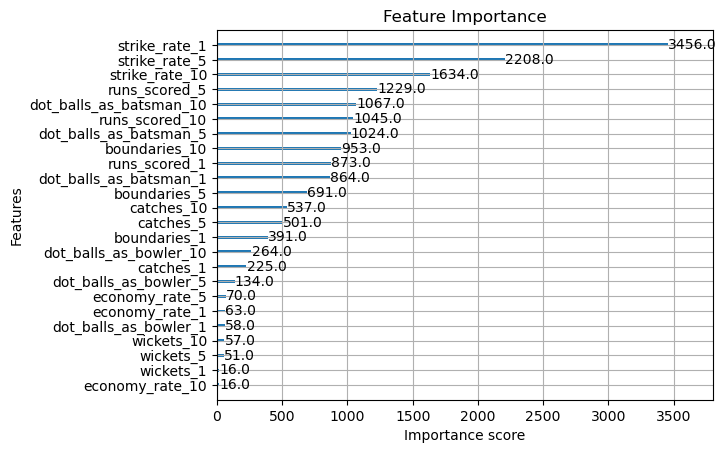

In [316]:
from xgboost import plot_importance
plot_importance(model)
plt.title("Feature Importance")
plt.show()

In [317]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [318]:
scaler = StandardScaler()
kohli_train_scaled = scaler.fit_transform(kohli_train.drop(columns=['name_x', 'player_id', 'match_id', 'start_date']))
kohli_test_scaled = scaler.transform(kohli_test.drop(columns=['name_x', 'player_id', 'match_id', 'start_date']))

In [319]:
pca = PCA()
kohli_train_pca = pca.fit_transform(kohli_train_scaled)

In [320]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

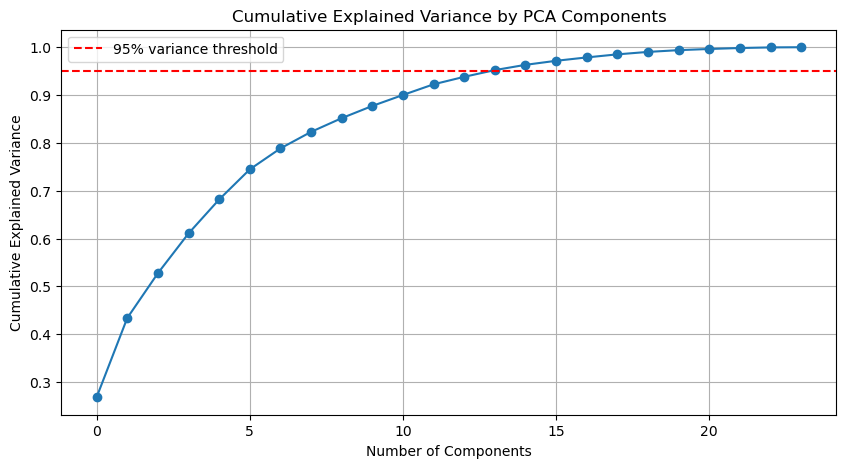

In [321]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.legend()
plt.show()

In [322]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 14


In [323]:
pca = PCA(n_components=n_components)
kohli_train_pca_reduced = pca.fit_transform(kohli_train_scaled)
kohli_test_pca_reduced = pca.fit_transform(kohli_test_scaled)

In [324]:
model_pca = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42)

In [325]:
model_pca.fit(kohli_train_pca_reduced, score_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [326]:
score_pred = model_pca.predict(kohli_test_pca_reduced)

In [327]:
score_pred

array([73.52896 , 59.102627, 74.26242 , 46.947556, 47.748924, 85.96331 ,
       44.787384, 56.22403 , 41.25617 , 52.945415, 52.826412, 24.685707,
       70.979614, 35.149483, 43.76009 , 50.286415, 55.292572, 16.766508,
       63.61987 , 21.989225, 57.30112 , 67.53118 , 38.562325, 38.03156 ,
       52.996525, 30.558907, 38.649635, 39.47587 , 19.76603 , 70.304634,
       47.686462, 39.396122, 47.8424  ], dtype=float32)

In [328]:
mse = mean_squared_error(score_test, score_pred)
r2 = r2_score(score_test, score_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


--- Model Evaluation ---
Mean Squared Error (MSE): 2237.32
R-squared (R²): -0.22


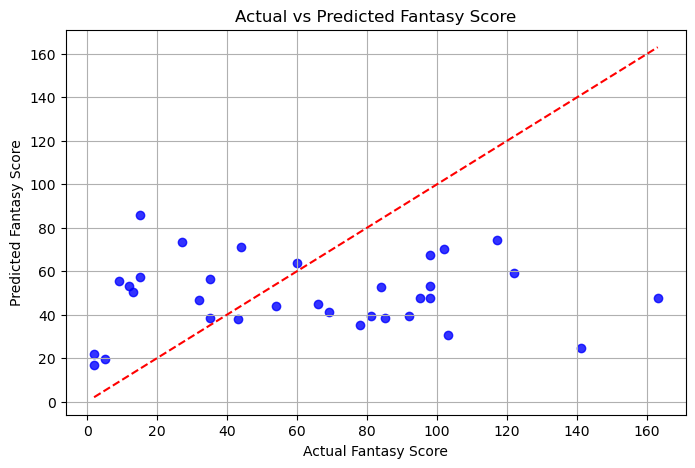

In [329]:
plt.figure(figsize=(8, 5))
plt.scatter(score_test, score_pred, alpha=0.8, color='blue')
plt.plot([score_test.min(), score_test.max()], [score_test.min(), score_test.max()], 'r--')
plt.xlabel("Actual Fantasy Score")
plt.ylabel("Predicted Fantasy Score")
plt.title("Actual vs Predicted Fantasy Score")
plt.grid(True)
plt.show()

In [330]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

In [331]:
rfe = RFE(estimator=XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42), n_features_to_select=10)

In [332]:
rfe_model = rfe.fit(kohli_train_scaled, score_train)

In [333]:
selected_features = [feature for feature, selected in zip(kohli_train.drop(columns=['name_x', 'player_id', 'match_id', 'start_date']).columns, rfe_model.support_) if selected]

In [334]:
feature_ranking = pd.DataFrame({
    'Feature': kohli_train.drop(columns=['name_x', 'player_id', 'match_id', 'start_date']).columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

In [335]:
print("\n Feature Ranking via RFE with XGBoost:\n", feature_ranking)
print("\n Selected Features:", selected_features)


 Feature Ranking via RFE with XGBoost:
                     Feature  Selected  Ranking
20  dot_balls_as_batsman_10      True        1
19   dot_balls_as_batsman_5      True        1
3            economy_rate_1      True        1
18   dot_balls_as_batsman_1      True        1
17               catches_10      True        1
16                catches_5      True        1
14           runs_scored_10      True        1
13            runs_scored_5      True        1
12            runs_scored_1      True        1
22    dot_balls_as_bowler_5      True        1
11            boundaries_10     False        2
23   dot_balls_as_bowler_10     False        3
15                catches_1     False        4
10             boundaries_5     False        5
9              boundaries_1     False        6
2            strike_rate_10     False        7
7                 wickets_5     False        8
8                wickets_10     False        9
1             strike_rate_5     False       10
4            econom

In [336]:
kohli_train_scaled = pd.DataFrame(kohli_train_scaled, columns=kohli_train.drop(columns=['name_x', 'player_id', 'match_id', 'start_date']).columns)
kohli_test_scaled = pd.DataFrame(kohli_test_scaled, columns=kohli_test.drop(columns=['name_x', 'player_id', 'match_id', 'start_date']).columns)

In [337]:
kohli_train_scaled_selected = kohli_train_scaled[selected_features]
kohli_test_scaled_selected = kohli_test_scaled[selected_features]

In [338]:
kohli_test_scaled_selected

,economy_rate_1,runs_scored_1,runs_scored_5,runs_scored_10,catches_5,catches_10,dot_balls_as_batsman_1,dot_balls_as_batsman_5,dot_balls_as_batsman_10,dot_balls_as_bowler_5
0,-0.14235,2.572506,1.610608,0.943608,0.551095,1.281336,0.647995,1.067306,0.365149,-0.459977
1,-0.14235,-0.398940,1.144750,1.069175,0.551095,1.281336,-0.242164,0.652349,0.575767,-0.459977
2,-0.14235,1.681072,2.186081,1.219854,1.956338,2.245721,2.428315,1.966380,0.912755,-0.459977
3,-0.14235,1.903931,3.076694,1.914654,1.253717,1.763529,1.538155,2.796295,1.586733,-0.459977
4,-0.14235,-0.361797,2.007959,1.646779,1.253717,1.763529,-0.420196,1.551423,1.586733,-0.459977
5,-0.14235,3.018223,2.172380,2.333208,1.253717,1.281336,2.962410,2.450497,2.176463,-0.459977
6,-0.14235,-1.067516,1.925748,1.897912,1.956338,1.763529,-0.420196,2.381338,1.881598,-0.459977
7,-0.14235,0.381064,1.446188,2.241126,0.551095,1.763529,-0.242164,1.343944,2.050092,-0.459977
8,-0.14235,-0.510369,0.555575,2.241126,0.551095,1.281336,-1.132324,0.306551,1.923721,-0.459977
9,-0.14235,0.715352,0.952925,1.830943,0.551095,1.281336,0.469963,0.652349,1.376115,-0.459977


In [339]:
final_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42)
final_model.fit(kohli_train_scaled_selected, score_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [340]:
score_pred_final = final_model.predict(kohli_test_scaled_selected)

In [341]:
score_pred_final

array([ 39.704845,  61.1019  ,  92.44803 ,  70.49339 ,  78.8914  ,
       100.79668 ,  20.772789,  71.03725 ,  82.8893  ,  68.06947 ,
        66.45731 ,  46.990185,  93.1337  ,  64.636856,  92.58403 ,
        47.24137 ,  69.428665,  15.517415,  64.97285 ,  53.432068,
        62.753624,  57.58514 ,  21.607384,  58.035774,  47.984756,
        87.03245 ,  34.74662 ,  57.736977,  31.43984 ,  44.628876,
        46.00178 ,  36.082516,  34.475716], dtype=float32)

In [345]:
mse = mean_squared_error(score_test, score_pred_final)
r2 = r2_score(score_test, score_pred_final)

In [346]:
print("Model Evaluation (on Selected Features):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation (on Selected Features):
Mean Squared Error (MSE): 2090.43
R-squared (R²): -0.14


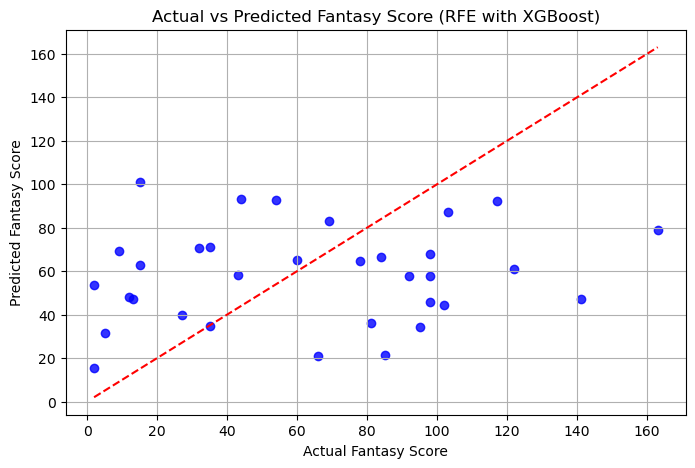

In [347]:
plt.figure(figsize=(8, 5))
plt.scatter(score_test, score_pred_final, alpha=0.8, color='blue')
plt.plot([score_test.min(), score_test.max()], [score_test.min(), score_test.max()], 'r--')
plt.xlabel("Actual Fantasy Score")
plt.ylabel("Predicted Fantasy Score")
plt.title("Actual vs Predicted Fantasy Score (RFE with XGBoost)")
plt.grid(True)
plt.show()